# Bayesian Updating Example
This notebook demonstrates Bayesian updating for recovery probabilities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import beta

np.random.seed(42)

## Simulated Historical Data

In [3]:
historical_data = np.random.binomial(1, 0.6, size=100)
historical_data

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1])

## Prior and Posterior

In [4]:

alpha_prior, beta_prior = 3, 2
alpha_post = alpha_prior + historical_data.sum()
beta_post = beta_prior + len(historical_data) - historical_data.sum()
alpha_post, beta_post


(68, 37)

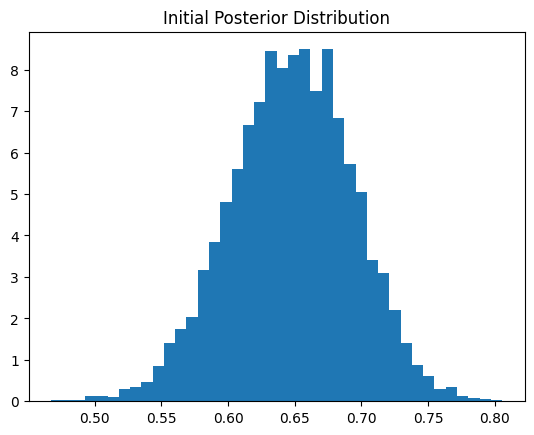

In [ ]:
theta_samples = beta.rvs(alpha_post, beta_post, size=5000)
plt.hist(theta_samples, bins=40, density=True)
plt.xlabel("Theta")
plt.ylabel("Density")
plt.title("Initial Posterior Distribution")
plt.show()

## New Incoming Data and Update

In [7]:
new_data = np.random.binomial(1, 0.55, size=50)
alpha_post_new = alpha_post + new_data.sum()
beta_post_new = beta_post + len(new_data) - new_data.sum()
alpha_post_new, beta_post_new

(92, 63)

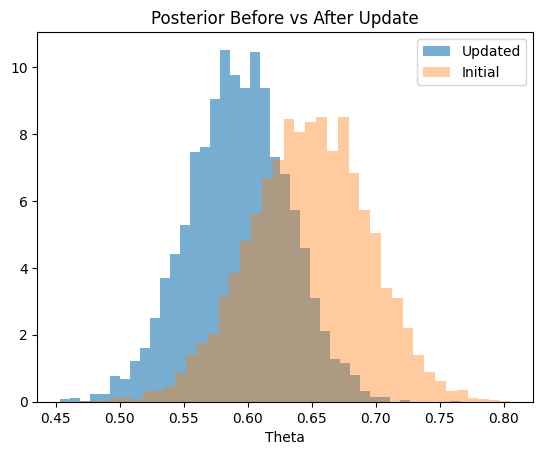

In [ ]:
theta_samples_new = beta.rvs(alpha_post_new, beta_post_new, size=5000)
plt.hist(theta_samples_new, bins=40, alpha=0.6, density=True, label='Updated')
plt.hist(theta_samples, bins=40, alpha=0.4, density=True, label='Initial')
plt.xlabel('Theta')
plt.ylabel("Density")
plt.legend()
plt.title("Posterior Before vs After Update")
plt.show()

## Analysis
The posterior shifts slightly downward with new data, showing how Bayesian updating adapts expectations based on evidence.


# In-Depth Analysis of Bayesian Updating Behavior

This notebook demonstrates how Bayesian updating behaves when modeling binary recovery outcomes.

## 1. Impact of the Prior
We began with a Beta prior (α=3, β=2), centered at 0.60. The prior expresses initial belief about recovery probability before observing data.

## 2. Influence of Initial Data
With 100 simulated claim outcomes, evidence dominates the prior. The posterior becomes narrow, indicating high certainty.

## 3. Posterior Behavior
The posterior distribution concentrates around ~0.6. This reflects strong evidence from historical claims, similar to real receivable portfolios.

## 4. Updating with New Data
Adding 5 additional weaker outcomes shifts the posterior slightly downward. Bayesian updating naturally weighs new evidence relative to existing data.

## 5. Practical Interpretation
In credit or receivable modeling:
- Early data causes large updates
- Mature portfolios update slowly
- Bayesian models stabilize estimates naturally

## 6. Expected Value Impact
Posterior mean changes flow through to valuation metrics like expected cashflows or XIRR valuations, directly impacting portfolio yield.

